In [147]:
import python_quant
import pandas as pd
import math

fs_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/재무제표데이터.xlsx'
fs_df = python_quant.get_finance_data(fs_path)
fr_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/재무비율데이터.xlsx'
fr_df = python_quant.get_finance_data(fr_path)
invest_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/투자지표데이터.xlsx'
invest_df = python_quant.get_finance_data(invest_path)
price_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/가격데이터.xlsx'
price_df = pd.read_excel(price_path, index_col=0)

In [118]:
low_pbr_st = python_quant.get_value_rank(invest_df, 'PBR', '2018/12',20)

In [119]:
low_pbr_st.head()

,PBR,PBR순위
A015760,0.30,1.0
A011210,0.31,2.5
A138930,0.31,2.5
A088350,0.33,4.0
A001430,0.34,5.5


In [120]:
code_list = []
for code in low_pbr_st.index : 
    code_list.append(code.replace('A',''))

In [170]:
price_df.head()

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차,LG화학,현대모비스,셀트리온,삼성물산,삼성SDI,...,한국쉘석유,남해화학,유니드,JW홀딩스,고려제강,쌍용차,남양유업,동양,현대리바트,효성중공업
2013-12-20,28540,35300,NaN,147409,224500,294000,281500,31543,NaN,162000,...,479000,6670,41984,2096,28352,6850,930000,1540,11600,NaN
2013-12-23,28660,37000,NaN,148210,228500,291000,285000,32511,NaN,163500,...,483000,6810,42726,2092,28539,6800,918000,1550,11700,NaN
2013-12-24,28300,36750,NaN,147009,226000,294500,287000,32511,NaN,161000,...,487000,6870,43542,2067,28314,6820,935000,1540,11800,NaN
2013-12-26,28160,36000,NaN,143003,225500,296000,288500,32006,NaN,160000,...,491000,6790,43690,2117,28314,6790,938000,1500,11550,NaN
2013-12-27,27920,36650,NaN,147009,229500,295500,289000,33045,NaN,162000,...,471500,6740,44209,2192,28051,7000,925000,1455,11650,NaN


In [122]:
low_pbr_st.index

Index(['A015760', 'A011210', 'A138930', 'A088350', 'A001430', 'A002240',
       'A001230', 'A004020', 'A006120', 'A034020', 'A086790', 'A298040',
       'A004800', 'A024110', 'A003240', 'A000670', 'A034220', 'A005380',
       'A005490', 'A002380'],
      dtype='object')

In [123]:
def code_corpname(df, file_path):
    new_index = []
    code_data = pd.read_excel(file_path)
    code_data = code_data[['종목코드','기업명']]
    for num, code in enumerate(code_data['종목코드']) : 
        code = 'A' + '0'*(6-len(str(code))) + str(code)
        code_data['종목코드'][num] = code
    for i in range(0, len(df)) :
        for k in range(0, len(code_data)) : 
            if df.index[i] == code_data['종목코드'][k] : 
                new_index.append(code_data['기업명'][k])
    df.index = new_index
    return df

In [124]:
path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/KOSPI200.xlsx'

In [125]:
pbr_df = code_corpname(low_pbr_st, path)
pbr_df.head()

C:\Users\elris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\elris\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PBR,PBR순위
한국전력,0.30,1.0
현대위아,0.31,2.5
BNK금융지주,0.31,2.5
한화생명,0.33,4.0
세아베스틸,0.34,5.5


In [132]:
pbr_price = price_df[pbr_df.index]['2019-6':]
pbr_price.head()

,한국전력,현대위아,BNK금융지주,한화생명,세아베스틸,고려제강,동국제강,현대제철,SK디스커버리,두산중공업,하나금융지주,효성중공업,효성,기업은행,태광산업,영풍,LG디스플레이,현대차,POSCO,KCC
2019-06-03,26650,39250,7040,3275,17300,22550,6380,41150,24300,6210,36700,33200.0,74400,13900,1315000,758000,16900,138500,241500,224754
2019-06-04,26000,40100,7140,3255,17000,22250,6390,40900,24550,6400,37100,33400.0,75000,13950,1310000,743000,17000,139000,240500,234411
2019-06-05,25700,40850,7110,3185,17050,22700,6360,40650,24400,6300,37000,34000.0,76700,13850,1292000,721000,16850,141000,238500,230899
2019-06-07,25700,42650,7070,3215,16800,23800,6380,40100,24550,6310,37500,34100.0,75100,13850,1299000,719000,16650,140000,234000,229143
2019-06-10,25350,45200,7150,3210,17200,24150,6450,40850,25150,6320,37750,33950.0,75400,13950,1329000,730000,17150,143000,237000,235728


In [133]:
pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns : 
    try :
        temp = int(5000000 / pbr_price[code][0])
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * pbr_price[code][0]
    
    except ValueError: 
        continue
    
cash_amount = 100000000 - stock_amount

In [134]:
pf_stock_num

{'한국전력': 187,
 '현대위아': 127,
 'BNK금융지주': 710,
 '한화생명': 1526,
 '세아베스틸': 289,
 '고려제강': 221,
 '동국제강': 783,
 '현대제철': 121,
 'SK디스커버리': 205,
 '두산중공업': 805,
 '하나금융지주': 136,
 '효성중공업': 150,
 '효성': 67,
 '기업은행': 359,
 '태광산업': 3,
 '영풍': 6,
 'LG디스플레이': 295,
 '현대차': 36,
 'POSCO': 20,
 'KCC': 22}

In [139]:
stock_pf = 0

for code in pbr_price.columns : 
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code]

In [142]:
low_pbr_backtest = pd.DataFrame({'주식포트폴리오' : stock_pf[:'2020-1']})

In [169]:
display(low_pbr_backtest.head())
display(low_pbr_backtest.tail())

,주식포트폴리오,현금포트폴리오
2019-06-03,98088028.0,1911972.00
2019-06-04,98421192.0,1912076.77
2019-06-05,98160018.0,1912181.54
2019-06-07,98325926.0,1912286.32
2019-06-10,99786926.0,1912391.11


,주식포트폴리오,현금포트폴리오
2020-01-23,89668320.0,1928702.50
2020-01-28,86711420.0,1928808.19
2020-01-29,86115580.0,1928913.88
2020-01-30,84395385.0,1929019.58
2020-01-31,83244160.0,1929125.28


In [174]:
cash_list = []

# 연이율 2%로 가정
for num in range(0, len(low_pbr_backtest)) : 
    cash = int(cash_amount) * math.exp(0.02 * (num/365))
    cash = round(cash,2)
    cash_list.append(cash)
    
low_pbr_backtest['현금포트폴리오'] = cash_list
display(low_pbr_backtest.head(10))
display(low_pbr_backtest.tail(10))

,주식포트폴리오,현금포트폴리오
2019-06-03,98088028.0,1911972.00
2019-06-04,98421192.0,1912076.77
2019-06-05,98160018.0,1912181.54
2019-06-07,98325926.0,1912286.32
2019-06-10,99786926.0,1912391.11
2019-06-11,101224952.0,1912495.90
2019-06-12,101275164.0,1912600.70
2019-06-13,101011786.0,1912705.50
2019-06-14,100850138.0,1912810.31
2019-06-17,100758390.0,1912915.12


,주식포트폴리오,현금포트폴리오
2020-01-16,89149270.0,1928174.16
2020-01-17,88896670.0,1928279.82
2020-01-20,88630020.0,1928385.48
2020-01-21,89095010.0,1928491.15
2020-01-22,90124370.0,1928596.82
2020-01-23,89668320.0,1928702.50
2020-01-28,86711420.0,1928808.19
2020-01-29,86115580.0,1928913.88
2020-01-30,84395385.0,1929019.58
2020-01-31,83244160.0,1929125.28


In [176]:
low_pbr_backtest['종합포트폴리오'] = low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()
# 초기 투자금 대비 변화율
low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1

In [177]:
display(low_pbr_backtest.head(10))
display(low_pbr_backtest.tail(10))

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2019-06-03,98088028.0,1911972.00,1.000000e+08,NaN,0.000000
2019-06-04,98421192.0,1912076.77,1.003333e+08,0.003333,0.003333
2019-06-05,98160018.0,1912181.54,1.000722e+08,-0.002602,0.000722
2019-06-07,98325926.0,1912286.32,1.002382e+08,0.001659,0.002382
2019-06-10,99786926.0,1912391.11,1.016993e+08,0.014576,0.016993
2019-06-11,101224952.0,1912495.90,1.031374e+08,0.014141,0.031374
2019-06-12,101275164.0,1912600.70,1.031878e+08,0.000488,0.031878
2019-06-13,101011786.0,1912705.50,1.029245e+08,-0.002551,0.029245
2019-06-14,100850138.0,1912810.31,1.027629e+08,-0.001570,0.027629
2019-06-17,100758390.0,1912915.12,1.026713e+08,-0.000892,0.026713


,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2020-01-16,89149270.0,1928174.16,91077444.16,0.002419,-0.089226
2020-01-17,88896670.0,1928279.82,90824949.82,-0.002772,-0.091751
2020-01-20,88630020.0,1928385.48,90558405.48,-0.002935,-0.094416
2020-01-21,89095010.0,1928491.15,91023501.15,0.005136,-0.089765
2020-01-22,90124370.0,1928596.82,92052966.82,0.011310,-0.079470
2020-01-23,89668320.0,1928702.50,91597022.50,-0.004953,-0.084030
2020-01-28,86711420.0,1928808.19,88640228.19,-0.032280,-0.113598
2020-01-29,86115580.0,1928913.88,88044493.88,-0.006721,-0.119555
2020-01-30,84395385.0,1929019.58,86324404.58,-0.019537,-0.136756
2020-01-31,83244160.0,1929125.28,85173285.28,-0.013335,-0.148267


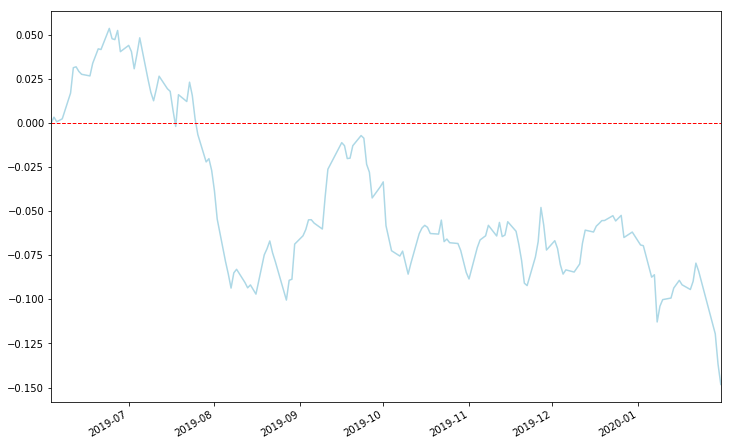

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
low_pbr_backtest['총변화율'].plot(color = 'lightblue')
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()